# ICO data

This notebook is used for the analysis of ICO data. There a couple of sources:
1. [ICO Bench](https://icobench.com) which has a lot of data.
2. [Tokendata](https://tokendata.io)
3. [Coinschedule](https://www.coinschedule.com/)
4. [CoinDesk ICO tracker](https://www.coindesk.com/ico-tracker)

First let's work with the ICO Bench data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import config
import datetime as dt
import numpy as np

%matplotlib inline

In [2]:
#Set a path

path = config.PATH_DATA_TEMP

In [3]:
#Import data

bench_overview = pd.read_csv(path + 'icos/ico_bench_overview.csv')
bench = pd.read_csv(path + 'icos/ico_bench.csv')

In [4]:
#Columns to clean up: name, raised_1, soft_cap, hard_cap, raised and maybe country

bench['name'] = bench['name'].str.lower()
bench['name'] = bench['name'].str.lower().str.strip()

replacements = {
   'raised': { r'\t': '', r'\$': '', r',': '', 'Unknown' : ''}
}

bench.replace(replacements, regex=True, inplace=True)
bench['raised'] = pd.to_numeric(bench['raised'])

In [5]:
bench_overview['name'] = bench_overview['name'].str.lower()

In [6]:
icos = pd.merge(bench_overview, bench, on='name', how='left')

In [7]:
icos['start'] = icos['start'].str.replace('Unknown', '').str.strip()
icos['start'] = pd.to_datetime(icos['start'])
icos['start_year'] = icos.start.dt.year.astype('Int64')

icos['end'] = icos['end'].str.replace('Unknown', '').str.strip()
icos['end'] = pd.to_datetime(icos['end'])

In [8]:
icos.sort_values(by='raised', ascending=False)

,name,url,about_x,start,end,tag_line,categories,rating,raised_1,status,...,type,preICO,price_in_ICO,min_investment,accepting,distributed_in_ICO,soft_cap,hard_cap,raised,start_year
2725,eos,/ico/eos,The Most Powerful Infrastructure for Decentral...,2017-06-26,2017-06-11,Decentralize Everything,Cryptocurrency,4.1,"~$4,197,956,135",Ended,...,ERC20,NaN,0.9900 USD,0.01 ETH,ETH,NaN,NaN,NaN,4.197956e+09,2017
4042,telegram open network,/ico/telegram-open-network,"Launching in 2018, this cryptocurrency will be...",2018-10-11,2018-03-29,Multi-blockchain Proof-of-Stake system,"Cryptocurrency,Platform,Infrastructure",3.9,"~$1,700,000,000",Ended,...,NaN,NaN,1.0000 USD,NaN,NaN,44%,NaN,NaN,1.700000e+09,2018
3826,bitfinex,/ico/bitfinex,"A new utility token, LEO, for use on Bitfinex ...",2019-05-05,2019-05-13,LEO Has Been Created With The iFinex And Crypt...,Cryptocurrency,3.7,"~$1,000,000,000",Ended,...,NaN,NaN,1.0000 USD,NaN,USDT,100%,NaN,NaN,1.000000e+09,2019
2808,tatatu,/ico/tatatu,The TaTaTu Platform will be a fair and transpa...,2018-06-11,2018-06-30,Social Entertainment On The Blockchain,Media,3.4,"~$575,000,000",Ended,...,ERC20,NaN,0.2500 USD,NaN,ETH,57%,"250,000,000 USD","575,000,000 USD",5.750000e+08,2018
3036,dragon,/ico/dragon,Dragon Coin represents a revolution in investi...,2018-02-15,2018-03-15,A Decentralized Currency for Casinos & Players,"Communication,Platform,Casino & Gambling",3.2,"~$320,000,000",Ended,...,ERC20,NaN,3.0300 USD,NaN,"ETH, BTC, USD",53%,NaN,NaN,3.200000e+08,2018
2896,hdac,/ico/hdac,The platform allows IoT devices to quickly and...,2017-11-27,2017-12-22,Blockchain based platform backed by Hyundai BS&C,"Cryptocurrency,Platform",3.3,"~$258,000,000",Ended,...,NaN,NaN,0.3410 USD,0.1 BTC,BTC,NaN,NaN,NaN,2.580000e+08,2017
4423,filecoin,/ico/filecoin,The Filecoin network achieves staggering econo...,2017-08-10,2017-09-10,A Decentralized Market for Storage,"Platform,Cryptocurrency",3.1,"~$257,000,000",Ended,...,NaN,NaN,0.7500 USD,NaN,"BTC, ETH, ZEC, Fiat",10%,NaN,"150,000,000 USD",2.570000e+08,2017
3737,tezos,/ico/tezos,A new decentralized blockchain that governs it...,2017-07-01,2017-07-13,The self-amending cryptographic ledger,Banking,2.8,"~$232,000,000",Ended,...,NaN,NaN,0.4700 USD,0.1 BTC,"BTC, ETH",NaN,NaN,NaN,2.320000e+08,2017
1912,kinesis,/ico/kinesis,Kinesis introduces yield-bearing digital curre...,2018-09-10,2019-09-07,An Evolution of the Gold Standard,"Cryptocurrency,Banking,Investment,Platform",4.3,"~$193,872,000",Ended,...,ERC20,NaN,"1,000.0000 USD",1 KVT,"BTC, ETH, Fiat",70%,"15,000","300,000",1.938720e+08,2018
3143,sirin labs,/ico/sirin-labs,SIRIN LABS’ vision is to become the world’s le...,2017-12-12,2017-12-26,Secure open source consumer electronics,"Electronics,Entertainment,Retail",3.6,"~$157,885,825",Ended,...,NaN,NaN,1.5480 USD,NaN,ETH,40%,"25,000,000 USD","75,000,000 USD",1.578858e+08,2017


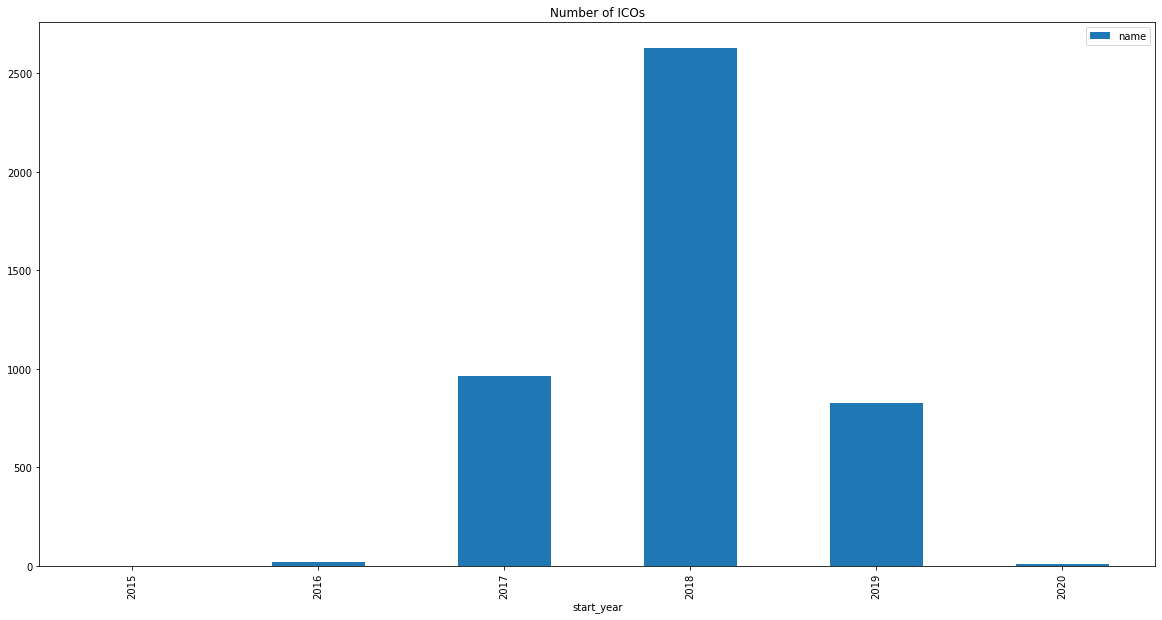

In [9]:
#Plot number of ICOs per year

viz_icos1 = icos.groupby(icos['start_year']).count().plot(kind='bar', 
                                                         y='name',
                                                         figsize=(20,10), 
                                                         title='Number of ICOs')


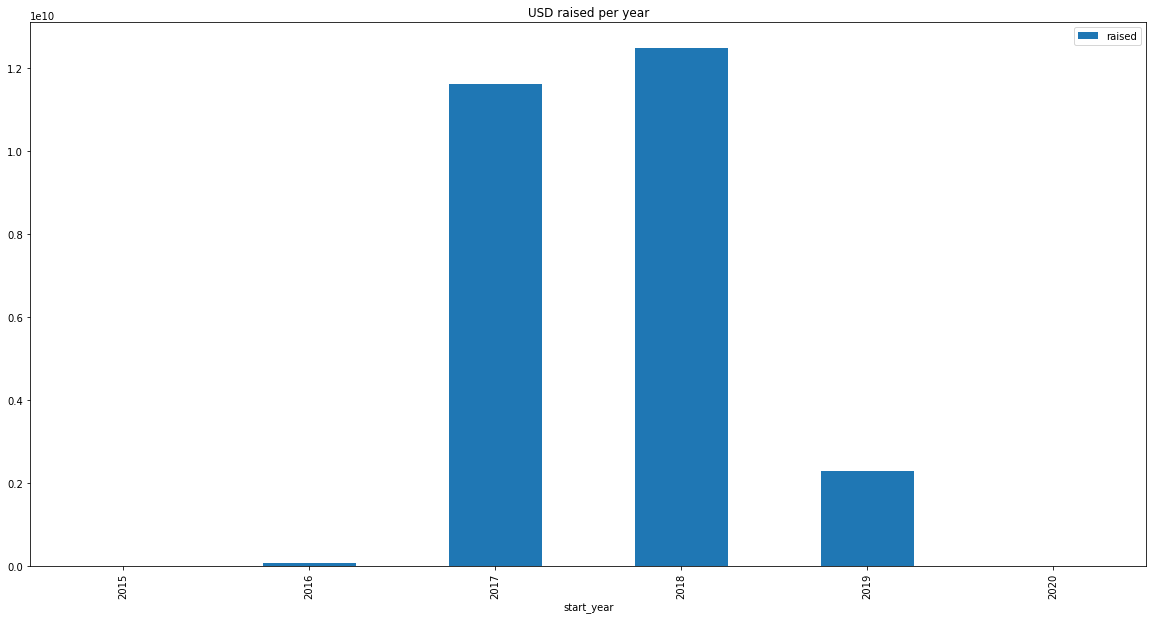

In [10]:
# Plot money raised per year

viz_icos2 = icos.groupby(icos['start_year']).sum().plot(kind='bar', 
                                                            figsize=(20,10),
                                                            y='raised',
                                                             title='USD raised per year')

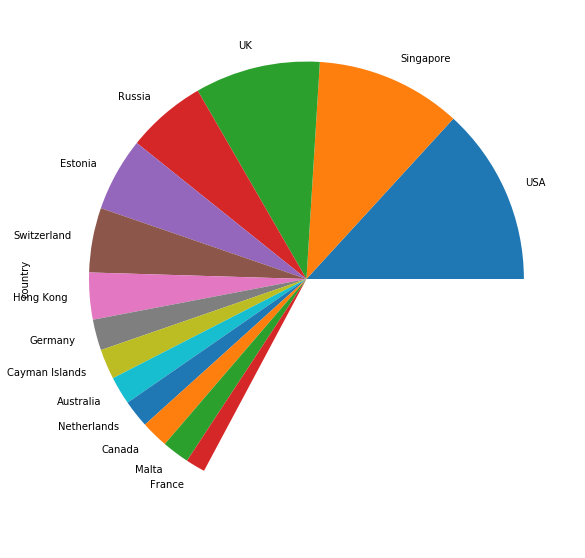

In [11]:
#Plot top 15 ICOs per country

countries = icos.country.value_counts(10)[:14]

countries.plot(kind='pie', figsize=(20,10), y='name')


In [12]:
nl = icos[icos['country'] == 'Netherlands']
nl_money_raised = nl[nl['raised'].notnull()]
nl_money_raised.sort_values(by='raised', ascending=False)

,name,url,about_x,start,end,tag_line,categories,rating,raised_1,status,...,type,preICO,price_in_ICO,min_investment,accepting,distributed_in_ICO,soft_cap,hard_cap,raised,start_year
1792,bitcanna,/ico/bitcanna,BitCanna will provide a decentralized payment ...,2018-11-15,2019-06-30,The Cannabis Blockchain Platform,Cryptocurrency,4.0,"~$16,000,000",Ended,...,Own,NaN,0.1200 USD,25 USD,"BTC, ETH, LTC, BCH, DASH, Fiat",60%,"3,000,000 USD","20,000,000 USD",16000000.0,2018
3837,blockport,/ico/blockport,Blockport is a hybrid-decentralized exchange w...,2018-01-24,2018-02-28,The First Social Crypto Exchange,"Platform,Media,Cryptocurrency",2.8,"~$15,118,350",Ended,...,ERC20,NaN,0.3300 USD,0.1 ETH,ETH,71.4%,NaN,"15,000 ETH",15118350.0,2018
4889,ignis,/ico/ignis,Jelurida is developing its next generation sca...,2017-08-05,2017-10-14,Next generation scalable blockchain platform,Other,2.5,"~$15,000,000",Ended,...,NaN,NaN,1.0500 USD,NaN,NaN,NaN,NaN,"525,000,000 USD",15000000.0,2017
1879,effect.ai,/ico/effect-ai,Effect.AI is a decentralized platform for Arti...,2018-03-01,2018-03-31,Decentralized Network for AI,"Artificial Intelligence,Platform",3.7,"~$13,602,384",Ended,...,NEP-5,NaN,0.0700 USD,50 EUR,"NEO, GAS",40%,"4,280,000 EUR","14,820,000 EUR",13602384.0,2018
3614,icoheadstart,/ico/icoheadstart,ICO HeadStart™ is the safest ICO fundraising p...,2018-03-26,2018-06-24,The Safest ICO Fundraising Platform,"Business services,Communication,Cryptocurrency...",3.1,"~$11,710,261",Ended,...,ERC20,NaN,0.0200 USD,0.01 ETH,"ETH, BTC",15%,NaN,"33,000 ETH",11710261.0,2018
1958,terawatt,/ico/terawatt,Drive LED lighting adoption by creating a DAO ...,2018-10-16,2019-01-15,Global LED Adoption Through Blockchain Technology,"Cryptocurrency,Business services,Energy,Infras...",3.5,"~$10,852,570",Ended,...,ERC20,1 LED = 0.30 USD,0.4000 USD,0.2 ETH,"BTC, ETH",65%,"2,000,000 USD","11,460,000 USD",10852570.0,2018
3740,ties.network,/ico/ties-network,Secure business deals within your professional...,2017-09-21,2017-10-26,Business platform backed by smart-contracts,"Business services,Platform",3.4,"~$9,000,000",Ended,...,ERC20,NaN,0.2400 USD,NaN,"BTC, ETH",70%,NaN,"33,600,000 USD",9000000.0,2017
2634,seal,/ico/seal,"To create a more genuine world, out of love fo...",2018-05-13,2018-05-27,Blockchain powered authentication for products,"Business services,Retail",4.2,"~$8,685,000",Ended,...,ERC20,1 SEAL = 0.08 USD,0.7000 USD,1 ETH,ETH,41%,"3,000,000","33,000,000 USD",8685000.0,2018
3406,primalbase,/ico/primalbase,Distributed Workspace for Tech Community.,2017-06-27,2017-06-28,Shares Workspace on Crypto Tokens,"Business services,Real estate",2.9,"~$7,600,000",Ended,...,NaN,NaN,"7,554.6000 USD",NaN,NaN,NaN,NaN,"7,554,600 USD",7600000.0,2017
2590,guts tickets,/ico/guts-tickets,GUTS is a ticketing system which uses blockcha...,2017-11-15,2017-12-15,Ticketing System with Blockchain Technology,"Platform,Software,Entertainment,Media",3.5,"~$7,500,000",Ended,...,ERC20,NaN,1.2330 USD,NaN,ETH,41%,"2,300,000 EUR","15,000,000 EUR",7500000.0,2017


In [13]:
nl.columns

Index(['name', 'url', 'about_x', 'start', 'end', 'tag_line', 'categories',
       'rating', 'raised_1', 'status', 'whitelist/kyc', 'country',
       'preICO_start', 'preICO end', 'ICO start', 'ICO end', 'about_y',
       'team_members_urls', 'token', 'platform', 'type', 'preICO',
       'price_in_ICO', 'min_investment', 'accepting', 'distributed_in_ICO',
       'soft_cap', 'hard_cap', 'raised', 'start_year'],
      dtype='object')

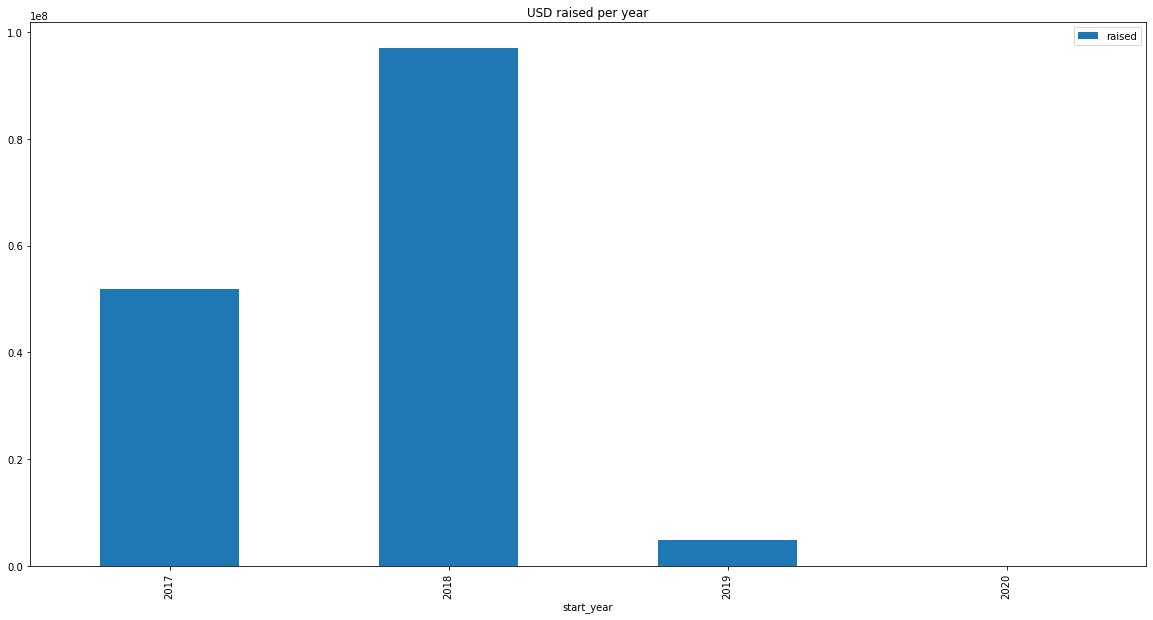

In [14]:
#Plot number of Dutch ICOs

nl_viz1 = nl.groupby(nl['start_year']).sum().plot(kind='bar',                                                    
                                                    figsize=(20,10),
                                                    y='raised',
                                                    title='USD raised per year')

## Coindesk

In [15]:
coindesk = pd.read_csv(path + '/icos/coindesk_ico_data.csv')

In [16]:
to_replace = {
   'ICO Size ($mn)': { r'\$': '', r',': '', '-' : '', ' ': ''}
}

coindesk.replace(to_replace, regex=True, inplace=True)


#coindesk['ICO Size ($mn)'] = coindesk['ICO Size ($mn)'].str.replace('$', '').str.strip()
#coindesk['ICO Size ($mn)'] = coindesk['ICO Size ($mn)'].str.replace('-', '').str.strip()

coindesk['ICO Size ($mn)'] = pd.to_numeric(coindesk['ICO Size ($mn)'])
coindesk['ICO Size ($mn)'] = coindesk['ICO Size ($mn)'] * 1000000

In [17]:
coindesk = coindesk.rename(columns={'Name': 'name', 'Close Date': 'close_date', 'ICO Size ($mn)': 'ico_size'})
coindesk['name'] = coindesk['name'].str.lower()
coindesk['close_date'] = pd.to_datetime(coindesk['close_date'])
coindesk['year'] = coindesk.close_date.dt.year

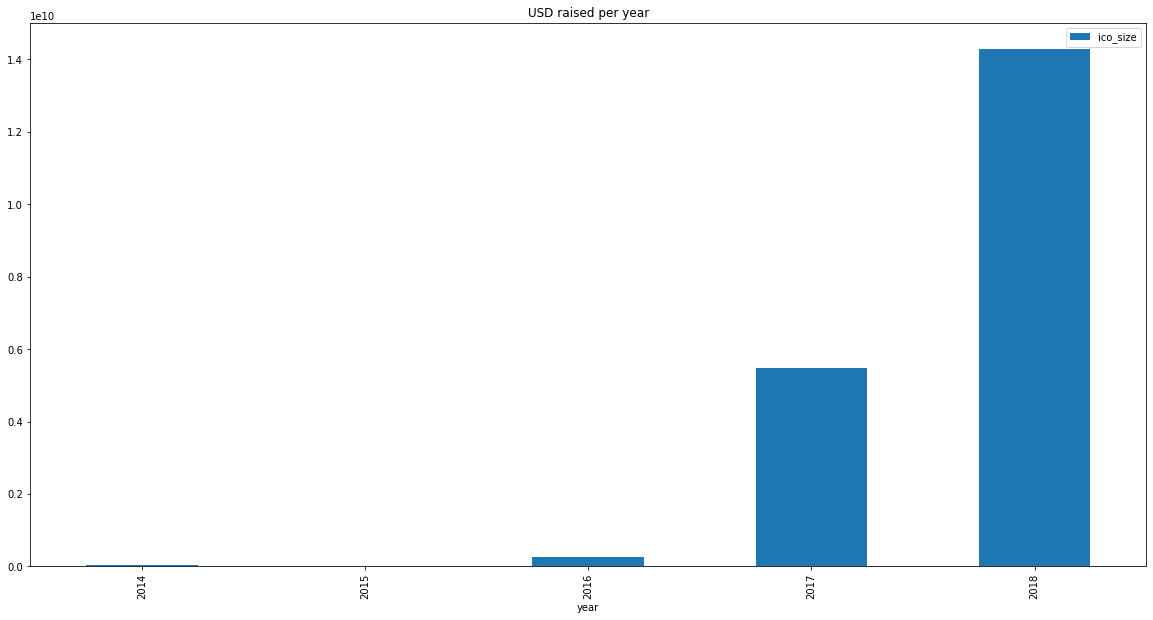

In [83]:
viz_coindesk = coindesk.groupby(coindesk['year']).sum().plot(kind='bar',                                                    
                                                    figsize=(20,10),
                                                    y='ico_size',
                                                    title='USD raised per year')

In [73]:
pattern = r'\s\(([0-9a-z-\s]+\))|\.'
coindesk['name_normalized'] = coindesk['name'].str.replace(pattern, '')

In [76]:
icos[icos['name_normalized'].str.contains('\(')]

,name,url,about_x,start,end,tag_line,categories,rating,raised_1,status,...,preICO,price_in_ICO,min_investment,accepting,distributed_in_ICO,soft_cap,hard_cap,raised,start_year,name_normalized
2292,poseidon network(qqq),/ico/poseidon-network-qqq,"Actually, our project was published on BitForex.",2019-05-11,2019-05-17,A Blockchain Transport Layer Solution,Internet,3.8,"~$500,000",Ended,...,NaN,0.0020 USD,NaN,ETH,NaN,NaN,NaN,500000.0,2019,poseidon network(qqq)


In [78]:
icos['name_normalized'] = icos['name'].str.replace(pattern, '')

In [80]:
icos_to_merge = icos[['name', 'raised', 'end', 'name_normalized']]

In [28]:
import fuzzy_pandas as fpd

In [81]:
matches = fpd.fuzzy_merge(icos_to_merge, coindesk,
                          left_on=['name_normalized'],
                          right_on=['name_normalized'],
                          ignore_case=True,
                          method='bilenko',
                          keep='match')

print(matches)


Answer questions as follows:
 y - yes
 n - no
 s - skip
 f - finished

name_normalized: denar

name_normalized: denaro

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: universal brand

name_normalized: universa

Do these records refer to the same thing? [y/n/s/f] 

s



name_normalized: storiqa

name_normalized: storiqa 1

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: qash by quoine

name_normalized: qash

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: decentraland

name_normalized: decent

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: signal

name_normalized: signals

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: ethereum movie venture

name_normalized: ethereum

Do these records refer to the same thing? [y/n/s/f] 

s



name_normalized: hut34 project

name_normalized: hut34

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: theta network

name_normalized: theta

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: rate3

name_normalized: rate3 network

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: aurora ecosystem

name_normalized: aurora

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: selfkey

name_normalized: selfkey pre-sale

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: paragon coin

name_normalized: paragon

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: hero

name_normalized: hero token

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: 0x

name_normalized: 0xcert protocol

Do these records refer to the same thing? [y/n/s/f] 

s



name_normalized: 0xcert

name_normalized: 0xcert protocol

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: vice industry token

name_normalized: vice industry

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: hero

name_normalized: hero node

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: mysterium

name_normalized: mysterium network

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: blockchain technology research innovations corporation

name_normalized: blockv

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: telegraf money

name_normalized: telegram

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: telegraf money

name_normalized: telegram

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: fanchain

name_normalized: wanchain

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: blockchain taxi

name_normalized: blockchain capital

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: gadcoin

name_normalized: gatcoin

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: streamex

name_normalized: streamr

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: dragon

name_normalized: aragon

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: srcoin

name_normalized: zrcoin

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: verifier

name_normalized: verify

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: verif-y

name_normalized: verify

Do these records refer to the same thing? [y/n/s/f] 

s



name_normalized: lto network

name_normalized: xyo network

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: lunox token

name_normalized: luna

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: crypto20

name_normalized: crypto 20

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: mvlchain

name_normalized: mvl chain

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: worldopo

name_normalized: worldwide anonymous messaging

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: saturn network

name_normalized: sapien network

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: telecoin

name_normalized: telcoin

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: blocklancer

name_normalized: blockbank

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: ether legends

name_normalized: etheroll

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: quantum intelligence

name_normalized: quantum1net

Do these records refer to the same thing? [y/n/s/f] 

s



name_normalized: cryptopay

name_normalized: cryptoping

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: blocklancer

name_normalized: blockpay

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: icoico

name_normalized: icoo

Do these records refer to the same thing? [y/n/s/f] 

s



name_normalized: layer protocol

name_normalized: codex protocol pre-sale

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: run2play - the blockchain fitness platform

name_normalized: b2bx

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: ethereum sweepstakes

name_normalized: ethercamp

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: bitron

name_normalized: biotronio

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: the praetorian group

name_normalized: the dao

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: swapsnetwork

name_normalized: seal network

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: bitcoinage

name_normalized: bitcoingrowthfund

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: vezet

name_normalized: vezt

Do these records refer to the same thing? [y/n/s/f] 

y



name_normalized: beveragecash

name_normalized: leverj

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: tradeplayz

name_normalized: tradeio

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: brickex

name_normalized: brickblock

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: origin protocol

name_normalized: credit protocol

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: smartgold

name_normalized: smart investment fund token

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: crypto potential

name_normalized: cryptopay

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: stablecoins by platinum q dao engineering

name_normalized: onlive

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: p2p solutions foundation

name_normalized: b2bx

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: publish

name_normalized: publica

Do these records refer to the same thing? [y/n/s/f] 

s



name_normalized: attrace

name_normalized: bitrace

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: e2c

name_normalized: 0xcert protocol

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: spacoin

name_normalized: appcoins

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: tokenai

name_normalized: tokenbox

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: chainium

name_normalized: chain of points

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: crypto'n'kafe

name_normalized: cryptopay

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: alttradex

name_normalized: alttex

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: smart valor

name_normalized: smart investment fund token

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: bob's repair

name_normalized: babb

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: blockstorage

name_normalized: blockpool

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: neo smart energy

name_normalized: restart energy democracy(mwat)

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: project with

name_normalized: project decorum

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: bitcub

name_normalized: bitclave

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: trustier

name_normalized: trustedhealth

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: airexe

name_normalized: airbloc protocol

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: solana

name_normalized: solomon exchange

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: nest

name_normalized: neuromation

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: gowithmi technology pte ltd [gowithmi],

name_normalized: onegram

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: 0x

name_normalized: 0chain

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: matrixone

name_normalized: matrixchain

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: cryptoalias

name_normalized: cryptopay

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: smartrealty

name_normalized: smartmesh

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: crypto jade

name_normalized: cryptopay

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: cryptoscene

name_normalized: cryptopay

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: ferrum network

name_normalized: fintrux network

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: procurean

name_normalized: props

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: marachain

name_normalized: titanium blockchain infrastructure services

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: medicoin

name_normalized: medicalchain

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: crypto improvement fund

name_normalized: paypie

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: cryptoscene

name_normalized: cryptosolartech

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: craftr

name_normalized: cryptosolartech

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: saiterm

name_normalized: hamster marketplace

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: reo

name_normalized: real

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: dacc

name_normalized: dcc

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: quantocoin

name_normalized: quantum resistant ledger

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: bankera

name_normalized: bancor

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: bitrus

name_normalized: bitrace

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: brixby

name_normalized: bricbit

Do these records refer to the same thing? [y/n/s/f] 

n



name_normalized: blackwave

name_normalized: blockhive

Do these records refer to the same thing? [y/n/s/f] 

f


INFO:dedupe.training:Final predicate set:
INFO:dedupe.training:(SimplePredicate: (sameFiveCharStartPredicate, name_normalized), TfidfNGramSearchPredicate: (0.6, name_normalized))
INFO:dedupe.training:(SimplePredicate: (firstTokenPredicate, name_normalized), TfidfTextSearchPredicate: (0.6, name_normalized))
INFO:dedupe.training:(LevenshteinSearchPredicate: (1, name_normalized), SimplePredicate: (metaphoneToken, name_normalized))
INFO:rlr.crossvalidation:using cross validation to find optimum alpha...
INFO:rlr.crossvalidation:optimum alpha: 0.000010, score 0.8989775330618414
INFO:dedupe.training:Final predicate set:
INFO:dedupe.training:(SimplePredicate: (firstTokenPredicate, name_normalized), TfidfNGramSearchPredicate: (0.6, name_normalized))
INFO:dedupe.training:(SimplePredicate: (firstIntegerPredicate, name_normalized), TfidfNGramSearchPredicate: (0.2, name_normalized))
INFO:dedupe.api:0 records
INFO:dedupe.api:100 records
INFO:dedupe.api:200 records
INFO:dedupe.api:300 records
INFO:d

                 name_normalized                 name_normalized
0                        credits                         credits
1                          sofin                           sofin
2                            wax                             wax
3                         aurora                          aurora
4                       blocktix                        blocktix
5                       tomocoin                        tomocoin
6                       exolover                        exolover
7                  open platform                   open platform
8                      videocoin                       videocoin
9                      blockport                       blockport
10                        flixxo                          flixxo
11                          hold                            hold
12                singularitynet                  singularitynet
13                      etherisc                        etherisc
14                      a